In [2]:
import pandas as pd
import numpy as np

In [3]:
#First I will do data preprocessing
dataset = pd.read_csv("Twitter.csv")

In [4]:
dataset

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [5]:
dataset.isnull().sum()

Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

In [6]:
dataset.describe()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,12681.192027,3.243473,0.280515,2.413711,0.549247,1.110277
std,7299.553863,0.883060,0.631851,1.399459,1.113299,0.462089
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,6372.500000,3.000000,0.000000,2.000000,0.000000,1.000000
50%,12703.000000,3.000000,0.000000,3.000000,0.000000,1.000000
75%,18995.500000,3.000000,0.000000,3.000000,0.000000,1.000000
max,25296.000000,9.000000,7.000000,9.000000,9.000000,2.000000


In [7]:
dataset["labels"] = dataset["class"].map({0: "Hate speech",
                                          1: "Offensive Language",
                                          2: "neither hate nor offensive"})

In [8]:
dataset

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,labels
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,neither hate nor offensive
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive Language
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive Language
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive Language
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive Language
...,...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,Offensive Language
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an...",neither hate nor offensive
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...,Offensive Language
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies,Offensive Language


In [9]:
import re
import nltk

In [10]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\satya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
stopwords_set = set(stopwords.words("english"))
print(stopwords_set)

{'is', 'you', 'while', 'didn', "mightn't", 'down', "weren't", 'but', 'herself', 'has', 'she', 'whom', 'out', 'aren', 'here', 'are', "hasn't", "you'll", 'that', 'very', 'after', "won't", 'any', "you've", "haven't", 'mightn', 'ma', 'theirs', 'where', 'which', 'can', 'hers', 'this', 'yourself', 'i', 'because', 'such', 'weren', 'just', "doesn't", 'its', 'if', 'then', 'being', "needn't", 'what', 'as', 'were', "should've", 'he', 's', "you're", 'before', 'ours', 'themselves', 'in', 'when', 'does', 've', 'haven', 'do', 'of', "didn't", 'by', "isn't", 'same', 'hadn', "hadn't", 'his', 'against', 'have', 'having', 'to', 'd', 'don', 'wouldn', 'yourselves', 'between', 'on', "shan't", 'we', 'himself', 'into', 'during', "you'd", 'through', 'some', 'was', 'doing', 'they', 'only', 'needn', 'until', 'an', 'nor', 'own', "wasn't", 'from', 'who', 'or', 'her', 'mustn', 'how', 'hasn', "it's", "wouldn't", 'y', 'm', 'll', 'no', 'ain', 'yours', 'these', 'isn', 'why', 'about', 'few', 'o', 'did', 'at', 'all', 'for

In [12]:
data = dataset[["tweet", "labels"]]

In [13]:
data

,tweet,labels
0,!!! RT @mayasolovely: As a woman you shouldn't...,neither hate nor offensive
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive Language
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive Language
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive Language
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive Language
...,...,...
24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,Offensive Language
24779,"you've gone and broke the wrong heart baby, an...",neither hate nor offensive
24780,young buck wanna eat!!.. dat nigguh like I ain...,Offensive Language
24781,youu got wild bitches tellin you lies,Offensive Language


In [14]:
stemmer = nltk.SnowballStemmer("english")

In [15]:
import string
#Data Preprocessing over and now i will start Data Cleaning.

In [16]:
def clean_data(text):
    text = str(text).lower()
    text = re.sub(r'https?://\S+|www\.\S+', " ", text)  # Fix escape sequences
    text = re.sub(r'<.*?>', ' ', text)  # Fix pattern for HTML tags
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)  # Fix punctuation removal pattern
    text = re.sub(r'\n', ' ', text)  # Fix new line replacement
    text = re.sub(r'\w*\d\w*', '', text)  # Fix word digit pattern
    
    # Stop words removal
    text = [word for word in text.split() if word not in stopwords_set]
    text = " ".join(text)
    return text

In [17]:
data["tweet"] = data["tweet"].apply(clean_data)

C:\Users\satya\AppData\Local\Temp\ipykernel_18272\1832165696.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["tweet"] = data["tweet"].apply(clean_data)


In [20]:
data

,tweet,labels
0,rt mayasolovely woman shouldnt complain cleani...,neither hate nor offensive
1,rt boy dats coldtyga dwn bad cuffin dat hoe place,Offensive Language
2,rt urkindofbrand dawg rt ever fuck bitch start...,Offensive Language
3,rt cganderson vivabased look like tranny,Offensive Language
4,rt shenikaroberts shit hear might true might f...,Offensive Language
...,...,...
24778,yous muthafin lie coreyemanuel right tl trash ...,Offensive Language
24779,youve gone broke wrong heart baby drove rednec...,neither hate nor offensive
24780,young buck wanna eat dat nigguh like aint fuck...,Offensive Language
24781,youu got wild bitches tellin lies,Offensive Language


In [21]:
data.describe()

,tweet,labels
count,24783,24783
unique,24505,3
top,bitch,Offensive Language
freq,23,19190


In [22]:
x = np.array(data["tweet"])
y = np.array(data["labels"])

In [23]:
x

array(['rt mayasolovely woman shouldnt complain cleaning house amp man always take trash',
       'rt boy dats coldtyga dwn bad cuffin dat hoe place',
       'rt urkindofbrand dawg rt ever fuck bitch start cry confused shit',
       ..., 'young buck wanna eat dat nigguh like aint fuckin dis',
       'youu got wild bitches tellin lies',
       'ruffled ntac eileen dahlia beautiful color combination pink orange yellow amp white coll'],
      dtype=object)

In [24]:
y

array(['neither hate nor offensive', 'Offensive Language',
       'Offensive Language', ..., 'Offensive Language',
       'Offensive Language', 'neither hate nor offensive'], dtype=object)

In [30]:
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [31]:
cv = CountVectorizer()
x = cv.fit_transform(x)

In [32]:
x

<24783x29755 sparse matrix of type '<class 'numpy.int64'>'
	with 199203 stored elements in Compressed Sparse Row format>

In [74]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 35)

In [75]:
#Building ML model now
from sklearn.tree import DecisionTreeClassifier

In [76]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [77]:
y_pred = dt.predict(x_test)

In [78]:
#Now checking accuracy
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [79]:
cm

array([[  71,  182,   26],
       [ 143, 3546,  108],
       [  18,  157,  706]], dtype=int64)

In [80]:
#not doing good for hate speech but doing fairly good for offensive and neither offensive nor hate... this is because of over-sampling and under-fitting
import seaborn as sns
import matplotlib.pyplot as ply
%matplotlib inline

Accuracy: 0.87


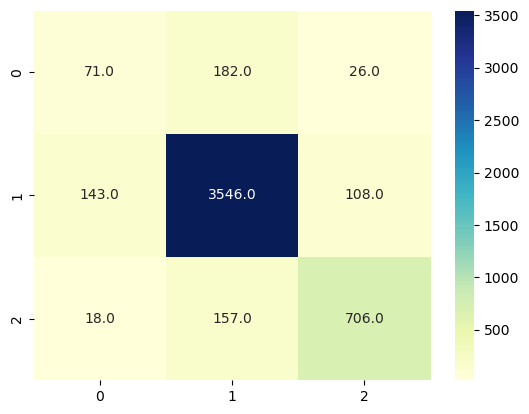

In [81]:
sns.heatmap(cm, annot=True, fmt=".1f", cmap="YlGnBu")
accuracy = np.trace(cm) / np.sum(cm)
print(f'Accuracy: {accuracy:.2f}')

In [82]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8721000605204761

In [84]:
#we did it by DecisionTreeClassifier and accuracy is 87%.... now i will do it by RandomForestClassifier too to see if accuracy increases
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [85]:
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

In [86]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[  52,  212,   15],
       [  80, 3651,   66],
       [   7,  197,  677]], dtype=int64)

Accuracy: 0.88


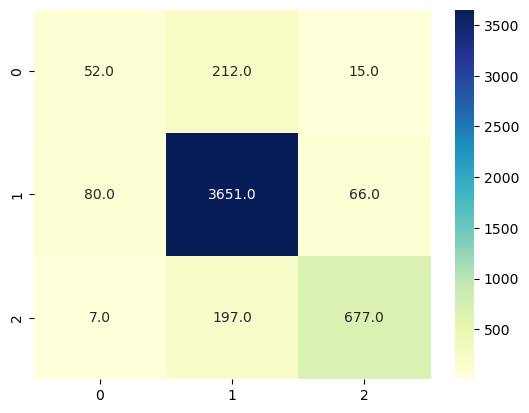

In [87]:
sns.heatmap(cm, annot=True, fmt=".1f", cmap="YlGnBu")
accuracy = np.trace(cm) / np.sum(cm)
print(f'Accuracy: {accuracy:.2f}')

In [88]:
accuracy_score(y_test, y_pred)

0.8835989509784143

In [89]:
#1% increase in accuracy but not worth it because the time taken to process the data was much longer
sample = "lets unite and kill all the people who are against the government"
sample = clean_data(sample)

In [90]:
sample

'lets unite kill people government'

In [91]:
data1 = cv.transform([sample]).toarray()

In [92]:
data1

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [93]:
dt.predict(data1)

array(['Hate speech'], dtype=object)

In [94]:
rf.predict(data1)

array(['Offensive Language'], dtype=object)

In [95]:
#1% increase in accuracy but not worth it because the time taken to process the data was much longer
sample = "lets kill all the muslims"
sample = clean_data(sample)

In [96]:
sample

'lets kill muslims'

In [97]:
data2 = cv.transform([sample]).toarray()

In [98]:
data2

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [99]:
dt.predict(data2)

array(['Hate speech'], dtype=object)

In [100]:
rf.predict(data2)

array(['Offensive Language'], dtype=object)

In [101]:
#1% increase in accuracy but not worth it because the time taken to process the data was much longer
sample = "Fuck the police coming straight from the underground nigga"
sample = clean_data(sample)

In [102]:
sample

'fuck police coming straight underground nigga'

In [103]:
data3 = data1 = cv.transform([sample]).toarray()

In [104]:
data3

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [105]:
rf.predict(data3)

array(['Offensive Language'], dtype=object)

In [106]:
dt.predict(data3)

array(['Offensive Language'], dtype=object)

In [ ]:
#so its fairly visible that my DecsionTree Classifier is working better than the RandomForestClassifier for this dataset